1 .una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [49]:
!pip install geopandas
!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas
import pandas as pd


In [2]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

     |████████████████████████████████| 994 kB 5.1 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   831k      0 --:--:-- --:--:-- --:--:--  830k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for 

In [2]:
BikeAreaSosta = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/Data/bike_areesosta')
BikeAreaSosta

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

In [3]:
Stradario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/Data/stradario.csv')
Stradario

CODICE_VIA AREA DESCRIZIONE_VIA  CIVICO BARRATO  CAP  SEZIONE  MUNICIPIO
0            4377  VIA  8 OTTOBRE 2001      12     NaN  138      916          4
1            3123  VIA     A.DEL SARTO       1     NaN  129      665          3
2            3123  VIA     A.DEL SARTO       3     NaN  129      665          3
3            3123  VIA     A.DEL SARTO       4     NaN  129      665          3
4            3123  VIA     A.DEL SARTO       5     NaN  129      665          3
...           ...  ...             ...     ...     ...  ...      ...        ...
51318        6318  VIA          ZURIGO      24     NaN  147      394          7
51319        6318  VIA          ZURIGO      24       4  147      394          7
51320        6318  VIA          ZURIGO      25     NaN  147     1412          6
51321        6318  VIA          ZURIGO      28     NaN  147      539          7
51322        6318  VIA          ZURIGO      65     NaN  147     1412          6

[51323 rows x 8 columns]

In [4]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/Data/ds964_nil_wm')
Quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [5]:
BikeAreaSosta.dtypes#possiamo notare che in id_via è una colonna con degli oggetti

id_amat          int64
id_via          object
num_civico      object
municipio       object
stato           object
categoriev      object
numero_man       int64
stalli_per       int64
stalli_tot       int64
tipomanufa      object
ubicazione      object
geometry      geometry
dtype: object

In [6]:
Stradario.dtypes #invece la colonna CODICe_VIA ci sono solo interi

CODICE_VIA          int64
AREA               object
DESCRIZIONE_VIA    object
CIVICO              int64
BARRATO            object
CAP                 int64
SEZIONE             int64
MUNICIPIO           int64
dtype: object

In [7]:
BikeAreaSosta[BikeAreaSosta['id_via'].isnull()] #va a controllare se nella colonna
#id_via è presente un elemento che non è un numero ovvero (None)

id_amat id_via  ...                     ubicazione                  geometry
50       65   None  ...  Area verde ? Giardino ? Parco  POINT (9.17257 45.42040)

[1 rows x 12 columns]

In [8]:
BikeAreaSosta2 = BikeAreaSosta.drop(BikeAreaSosta[BikeAreaSosta['id_via'].isnull()].index)
BikeAreaSosta2
#con la variabile BikeAreaSosta2 va a eliminare nel geodataframe BikeAreaSosta (nella colonna id_via)
#l'indice(index) nella quale non c'è un numero (None)

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1521 rows x 12 columns]

In [9]:
BikeAreaSosta2['id_via']=BikeAreaSosta2['id_via'].astype(int)
#con astype converte la colonna id via nel geodataframe BikeAreaSosta2 in un int 

In [10]:
BikeAreaSosta2.dtypes
#come possiamo vedere la colonna è stata convertita

id_amat          int64
id_via           int64
num_civico      object
municipio       object
stato           object
categoriev      object
numero_man       int64
stalli_per       int64
stalli_tot       int64
tipomanufa      object
ubicazione      object
geometry      geometry
dtype: object

In [11]:
ListaAree = pd.merge(BikeAreaSosta2,Stradario,how='inner',left_on=['id_via'],right_on=['CODICE_VIA'])
ListaAree
#Con questo codice facciamo un merge tra BikeAreaSosta e Stradario
#con how gli diciamo come fare il merge in questo caso 'inner'
#poi li 'fondiamo' tramite le colonne id_via e CODICE_VIA

id_amat  id_via num_civico municipio  ... BARRATO  CAP  SEZIONE  MUNICIPIO
0            2    5339          0         5  ...     NaN  142     2066          5
1            2    5339          0         5  ...     NaN  142     2066          5
2            2    5339          0         5  ...     NaN  142     2066          5
3            2    5339          0         5  ...     NaN  142     2066          5
4            2    5339          0         5  ...     NaN  142     2066          5
...        ...     ...        ...       ...  ...     ...  ...      ...        ...
39919     3243    4290         36         5  ...       A  139      947          4
39920     3243    4290         36         5  ...       A  139      947          4
39921     3243    4290         36         5  ...     NaN  139      946          5
39922     3243    4290         36         5  ...     NaN  139      947          4
39923     3243    4290         36         5  ...     NaN  139      947          4

[39924 rows x 20 columns]

In [12]:
ListaAree[['DESCRIZIONE_VIA','CIVICO','stalli_tot']]
#con questo cod mostriamo solo le 3 colonne:DESCRIZIONE_VIA,CIVICO,stalli_tot

DESCRIZIONE_VIA  CIVICO  stalli_tot
0       ABBIATEGRASSO       1          15
1       ABBIATEGRASSO       2          15
2       ABBIATEGRASSO       7          15
3       ABBIATEGRASSO       8          15
4       ABBIATEGRASSO      12          15
...               ...     ...         ...
39919     SAN DIONIGI     117          30
39920     SAN DIONIGI     119          30
39921     SAN DIONIGI     120          30
39922     SAN DIONIGI     121          30
39923     SAN DIONIGI     135          30

[39924 rows x 3 columns]

2.una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

**Differenza tra merge & sjoin**

**Merge** 'fonde' 2 Dataframe (o 1 GeoDataframe e 1 Dataframe) che hanno degli elementi uguali/simili su una colonna o direttamente una colonna intera in comune

**sjoin** fonde 2 Geodataframe tramite operazioni(within,intersects,touches...)

In [13]:
ConQuart = geopandas.sjoin(ListaAree,Quartieri,op='within',how='left')
ConQuart
#con sjoin 'fonde' ListeAree e Quartieri 
#in base le Aree che stanno all'interno(within) di quartieri

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


id_amat  id_via num_civico  ...   Shape_Leng    Shape_Area OBJECTID
0            2    5339          0  ...  8831.940397  3.232115e+06    148.0
1            2    5339          0  ...  8831.940397  3.232115e+06    148.0
2            2    5339          0  ...  8831.940397  3.232115e+06    148.0
3            2    5339          0  ...  8831.940397  3.232115e+06    148.0
4            2    5339          0  ...  8831.940397  3.232115e+06    148.0
...        ...     ...        ...  ...          ...           ...      ...
39919     3243    4290         36  ...  7108.599989  1.736689e+06    150.0
39920     3243    4290         36  ...  7108.599989  1.736689e+06    150.0
39921     3243    4290         36  ...  7108.599989  1.736689e+06    150.0
39922     3243    4290         36  ...  7108.599989  1.736689e+06    150.0
39923     3243    4290         36  ...  7108.599989  1.736689e+06    150.0

[39924 rows x 29 columns]

In [14]:
ConQuart[['DESCRIZIONE_VIA','CIVICO','stalli_tot','NIL']]

DESCRIZIONE_VIA  ...                                                NIL
0       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...               ...  ...                                                ...
39919     SAN DIONIGI  ...                                       SCALO ROMANA
39920     SAN DIONIGI  ...                                       SCALO ROMANA
39921     SAN DIONIGI  ...                                       SCALO ROMANA
39922     SAN DIONIGI  ...                                       SCALO ROMANA
39923     SAN DIONIGI  ...                                       SCALO ROMANA

[39924 rows x 4 columns]

 3.i nomi dei quartieri in cui non ci sono aree di sosta;


In [15]:
NoAree = Quartieri[Quartieri.intersects(BikeAreaSosta.unary_union)==False]
NoAree
#Con NoAree troviamo tutti i quartieri che non hanno aree di sosta

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

4. una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta


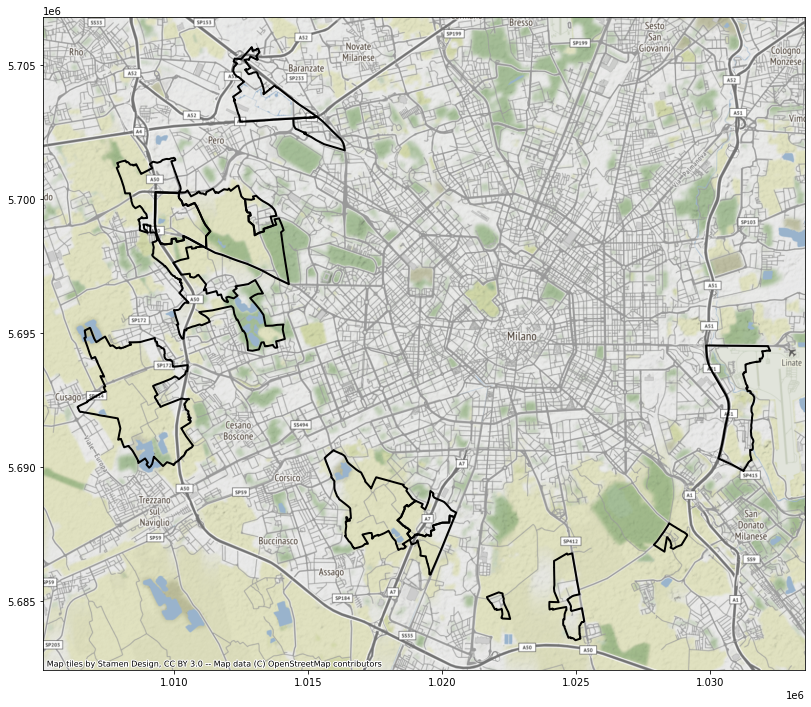

In [16]:
ax = NoAree.to_crs(3857).plot(figsize=(20,12),facecolor='none',edgecolor='k',linewidth=2)
ctx.add_basemap(ax)

5 il nome del quartiere con più aree di sosta;


In [17]:
QuartAree = ConQuart[['DESCRIZIONE_VIA','CIVICO','stalli_tot','NIL']]
QuartAree

DESCRIZIONE_VIA  ...                                                NIL
0       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...               ...  ...                                                ...
39919     SAN DIONIGI  ...                                       SCALO ROMANA
39920     SAN DIONIGI  ...                                       SCALO ROMANA
39921     SAN DIONIGI  ...                                       SCALO ROMANA
39922     SAN DIONIGI  ...                                       SCALO ROMANA
39923     SAN DIONIGI  ...                                       SCALO ROMANA

[39924 rows x 4 columns]

In [18]:
#modo 1
MassimoAree = QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count()[QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count() == QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count().max() ]
MassimoAree
#con MassimoAree facciamo un groupby su NIL nel dataframe QuartAree e cerchiamo un elemento da un altro QuartAree il suo massimo

NIL
LORETO - CASORETTO - NOLO    4090
Name: DESCRIZIONE_VIA, dtype: int64

In [62]:
PiuAree2 = Quartieri[Quartieri.NIL.isin(MassimoAree.index)]
PiuAree2
#Poi con PiuAree2 cerchiamo se all'interno di Quartieri ['NIL'] 
#c'è un elemento come MassimoAree

ID_NIL  ...                                           geometry
6      20  ...  POLYGON ((9.23044 45.49250, 9.23090 45.49197, ...

[1 rows x 9 columns]

In [20]:
#modo 2
MaxAree = ConQuart.groupby('NIL').count().sort_values('DESCRIZIONE_VIA',ascending=False)['DESCRIZIONE_VIA']
MaxAree.head(1).index
#Con MaxAree Raggruppiamo ConQuart in base al NIL,contandoli e mettendoli in ordine dal + piccolo al + grande
#e con head prendiamo il primo ossia quello con il num + grande

Index(['LORETO - CASORETTO - NOLO'], dtype='object', name='NIL')

In [21]:
PiuAree = Quartieri[Quartieri.NIL.isin(MaxAree.head(1).index)]
PiuAree

ID_NIL  ...                                           geometry
6      20  ...  POLYGON ((9.23044 45.49250, 9.23090 45.49197, ...

[1 rows x 9 columns]

- una mappa di Milano con l'indicazione 

del quartiere con più aree di sosta;

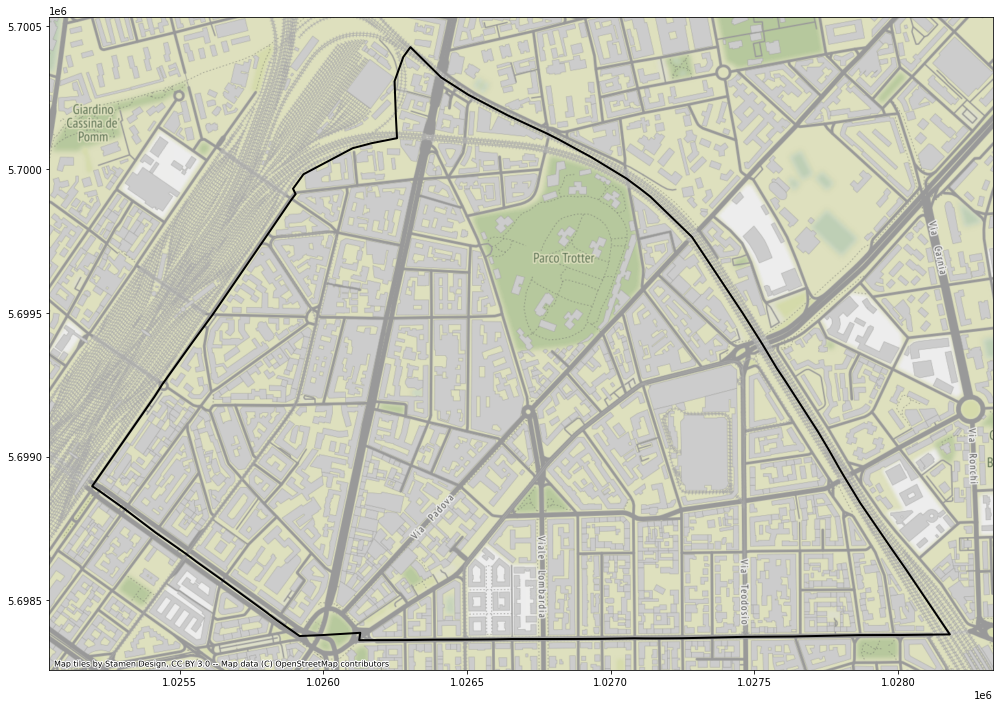

In [22]:
x = PiuAree.to_crs(3857).plot(figsize=(20,12),facecolor='none',edgecolor='k',linewidth=2)
ctx.add_basemap(x)

7 i nomi dei quartieri con un numero di aree di sosta minori della media

In [23]:
MenoMedia = QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count()[QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count() <= QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count().mean()]
MenoMedia

NIL
ADRIANO                                                    99
AFFORI                                                    491
BANDE NERE                                                444
BARONA                                                    236
BICOCCA                                                   401
BOVISA                                                    395
BOVISASCA                                                 146
BRUZZANO                                                  130
COMASINA                                                   20
DE ANGELI - MONTE ROSA                                    454
DERGANO                                                   354
FARINI                                                     64
GHISOLFA                                                  189
GIAMBELLINO                                               357
GIARDINI P.TA VENEZIA                                     336
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE              220
GREC

8 una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media;

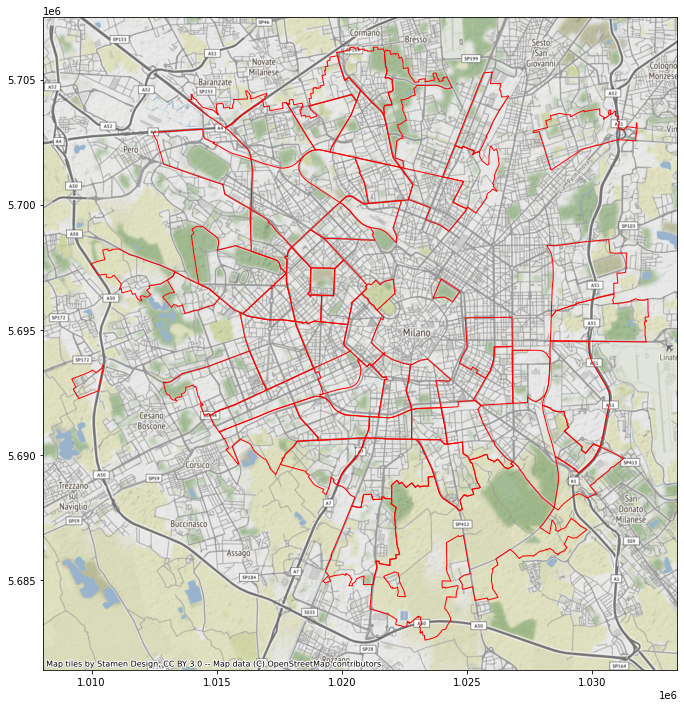

In [24]:
QuartieriMenoMedia = Quartieri[Quartieri.NIL.isin(MenoMedia.index)]
ax = QuartieriMenoMedia.to_crs(3857).plot(figsize=(20,12),facecolor='none',edgecolor='r')
ctx.add_basemap(ax)

9 una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;

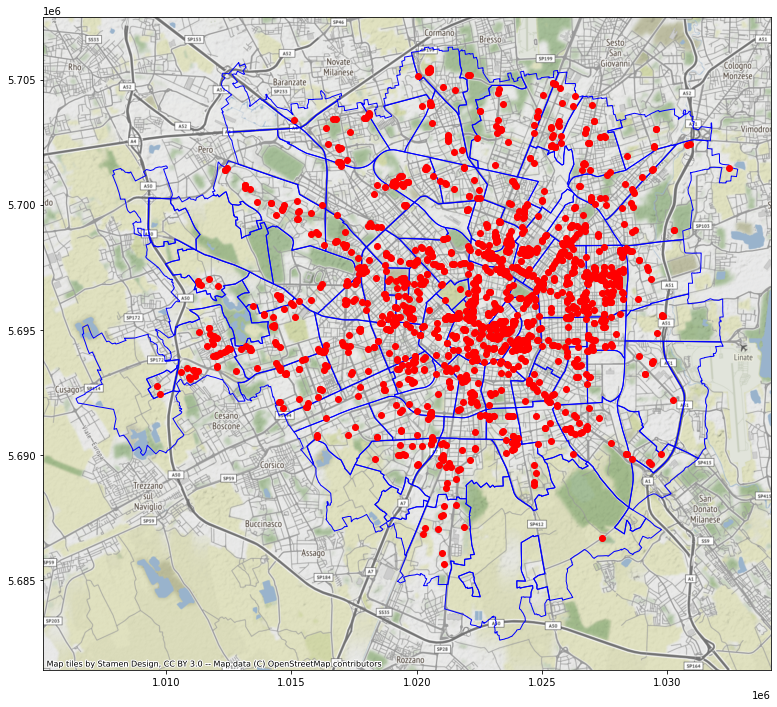

In [63]:
ax=Quartieri.to_crs(3857).plot(figsize=(20,12),edgecolor='b',facecolor='none')
BikeAreaSosta.to_crs(3857).plot(ax=ax,facecolor='r')
ctx.add_basemap(ax)

10 una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;


In [26]:
QuartAree

DESCRIZIONE_VIA  ...                                                NIL
0       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4       ABBIATEGRASSO  ...  STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...               ...  ...                                                ...
39919     SAN DIONIGI  ...                                       SCALO ROMANA
39920     SAN DIONIGI  ...                                       SCALO ROMANA
39921     SAN DIONIGI  ...                                       SCALO ROMANA
39922     SAN DIONIGI  ...                                       SCALO ROMANA
39923     SAN DIONIGI  ...                                       SCALO ROMANA

[39924 rows x 4 columns]

In [27]:
NAree = QuartAree.groupby('NIL')['DESCRIZIONE_VIA'].count().reset_index()
NAree
#Con NAree raggruppiamo QuartAree in base al NIL,contandoli e resettando l'index
#(reset_index fa in modo di creare un indice a parte e non rendendo NIL indice)

NIL  DESCRIZIONE_VIA
0                                    ADRIANO               99
1                                     AFFORI              491
2   BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA              554
3                                 BANDE NERE              444
4                                     BARONA              236
..                                       ...              ...
71                         TRIULZO SUPERIORE               29
72              UMBRIA - MOLISE - CALVAIRATE              277
73                   VIGENTINO - Q.RE FATIMA              249
74       VILLAPIZZONE - CAGNOLA - BOLDINASCO              540
75                                XXII MARZO              409

[76 rows x 2 columns]

In [28]:
QuartENAree = pd.merge(Quartieri,NAree,how='inner',on='NIL')
QuartENAree

ID_NIL  ... DESCRIZIONE_VIA
0       48  ...              52
1       67  ...             354
2       81  ...             146
3       84  ...               6
4       20  ...            4090
..     ...  ...             ...
71      68  ...             447
72       2  ...            1538
73      33  ...              54
74      17  ...              99
75      53  ...             428

[76 rows x 10 columns]

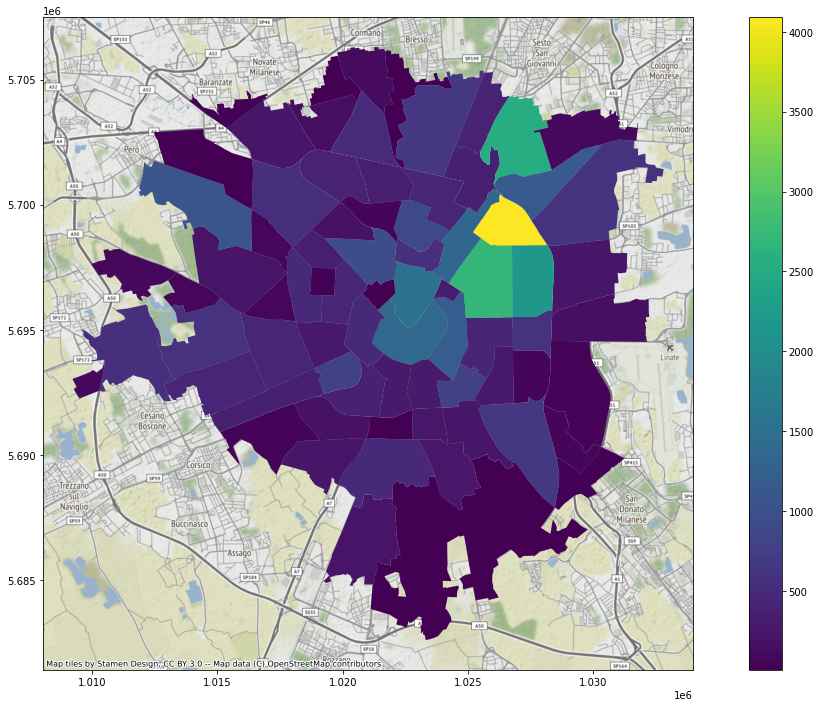

In [29]:
ax = QuartENAree.to_crs(3857).plot(figsize=(20,12),legend=True,column='DESCRIZIONE_VIA')
ctx.add_basemap(ax)

11 data una via (inserita dall'utente), avere le aree di sosta di quella via

In [35]:
BikeAreaSosta2

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1521 rows x 12 columns]

In [31]:
Stradario

CODICE_VIA AREA DESCRIZIONE_VIA  CIVICO BARRATO  CAP  SEZIONE  MUNICIPIO
0            4377  VIA  8 OTTOBRE 2001      12     NaN  138      916          4
1            3123  VIA     A.DEL SARTO       1     NaN  129      665          3
2            3123  VIA     A.DEL SARTO       3     NaN  129      665          3
3            3123  VIA     A.DEL SARTO       4     NaN  129      665          3
4            3123  VIA     A.DEL SARTO       5     NaN  129      665          3
...           ...  ...             ...     ...     ...  ...      ...        ...
51318        6318  VIA          ZURIGO      24     NaN  147      394          7
51319        6318  VIA          ZURIGO      24       4  147      394          7
51320        6318  VIA          ZURIGO      25     NaN  147     1412          6
51321        6318  VIA          ZURIGO      28     NaN  147      539          7
51322        6318  VIA          ZURIGO      65     NaN  147     1412          6

[51323 rows x 8 columns]

In [69]:
VieAree = pd.merge(Stradario,BikeAreaSosta2,how='inner',left_on='CODICE_VIA',right_on='id_via')
VieAree.drop_duplicates

<bound method DataFrame.drop_duplicates of        CODICE_VIA AREA  ...   ubicazione                  geometry
0            1310  VIA  ...  Marciapiede  POINT (9.19835 45.50102)
1            1310  VIA  ...  Marciapiede  POINT (9.19835 45.50102)
2            5339  PZA  ...  Marciapiede  POINT (9.17821 45.42991)
3            5339  PZA  ...  Marciapiede  POINT (9.17821 45.42991)
4            5339  PZA  ...  Marciapiede  POINT (9.17821 45.42991)
...           ...  ...  ...          ...                       ...
39919        6318  VIA  ...  Marciapiede  POINT (9.12173 45.45735)
39920        6318  VIA  ...  Marciapiede  POINT (9.12173 45.45735)
39921        6318  VIA  ...  Marciapiede  POINT (9.12173 45.45735)
39922        6318  VIA  ...  Marciapiede  POINT (9.12173 45.45735)
39923        6318  VIA  ...  Marciapiede  POINT (9.12173 45.45735)

[39924 rows x 20 columns]>

In [70]:
userVia = input('inserisci nome via: ')

print(len(VieAree[VieAree.DESCRIZIONE_VIA==userVia].num_civico.values), 'aree di sosta presenti nei civ: ', VieAree[VieAree.DESCRIZIONE_VIA==userVia].num_civico.values)

inserisci nome via: ZURIGO
17 aree di sosta presenti nei civ:  ['3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3' '3']


12 dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta

In [44]:
Quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

Inserire un quartiere: BRERA


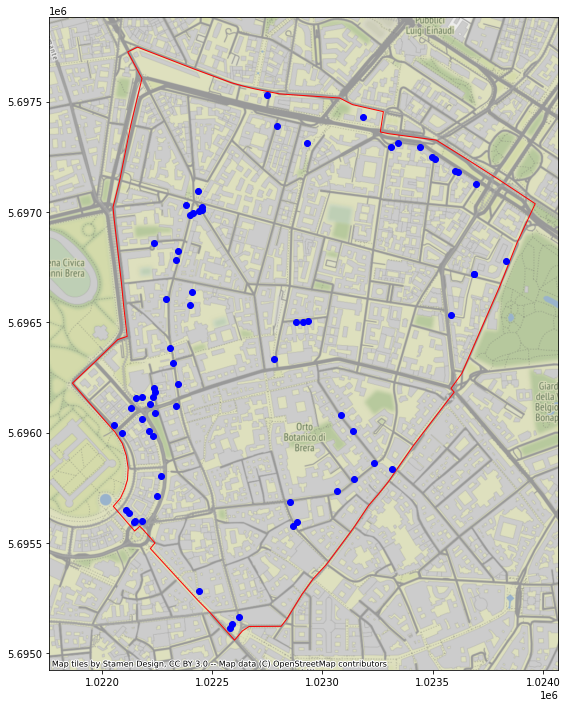

In [60]:
user = input('Inserire un quartiere: ')
lst = list(Quartieri['NIL'])
if user not in lst:
  print('Quartiere inesistente')
else:
  Quar = Quartieri[Quartieri.NIL == user]
  AreeQuar = BikeAreaSosta[BikeAreaSosta.within(Quar.geometry.squeeze())]
  ax = Quar.to_crs(3857).plot(figsize=(20,12),edgecolor='r',facecolor='none')
  AreeQuar.to_crs(3857).plot(ax=ax,facecolor='b')
  ctx.add_basemap(ax)

13 date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;